In [2]:
import numpy as np
import numpy.linalg as la
from numpy.typing import NDArray
from math import factorial
from itertools import permutations

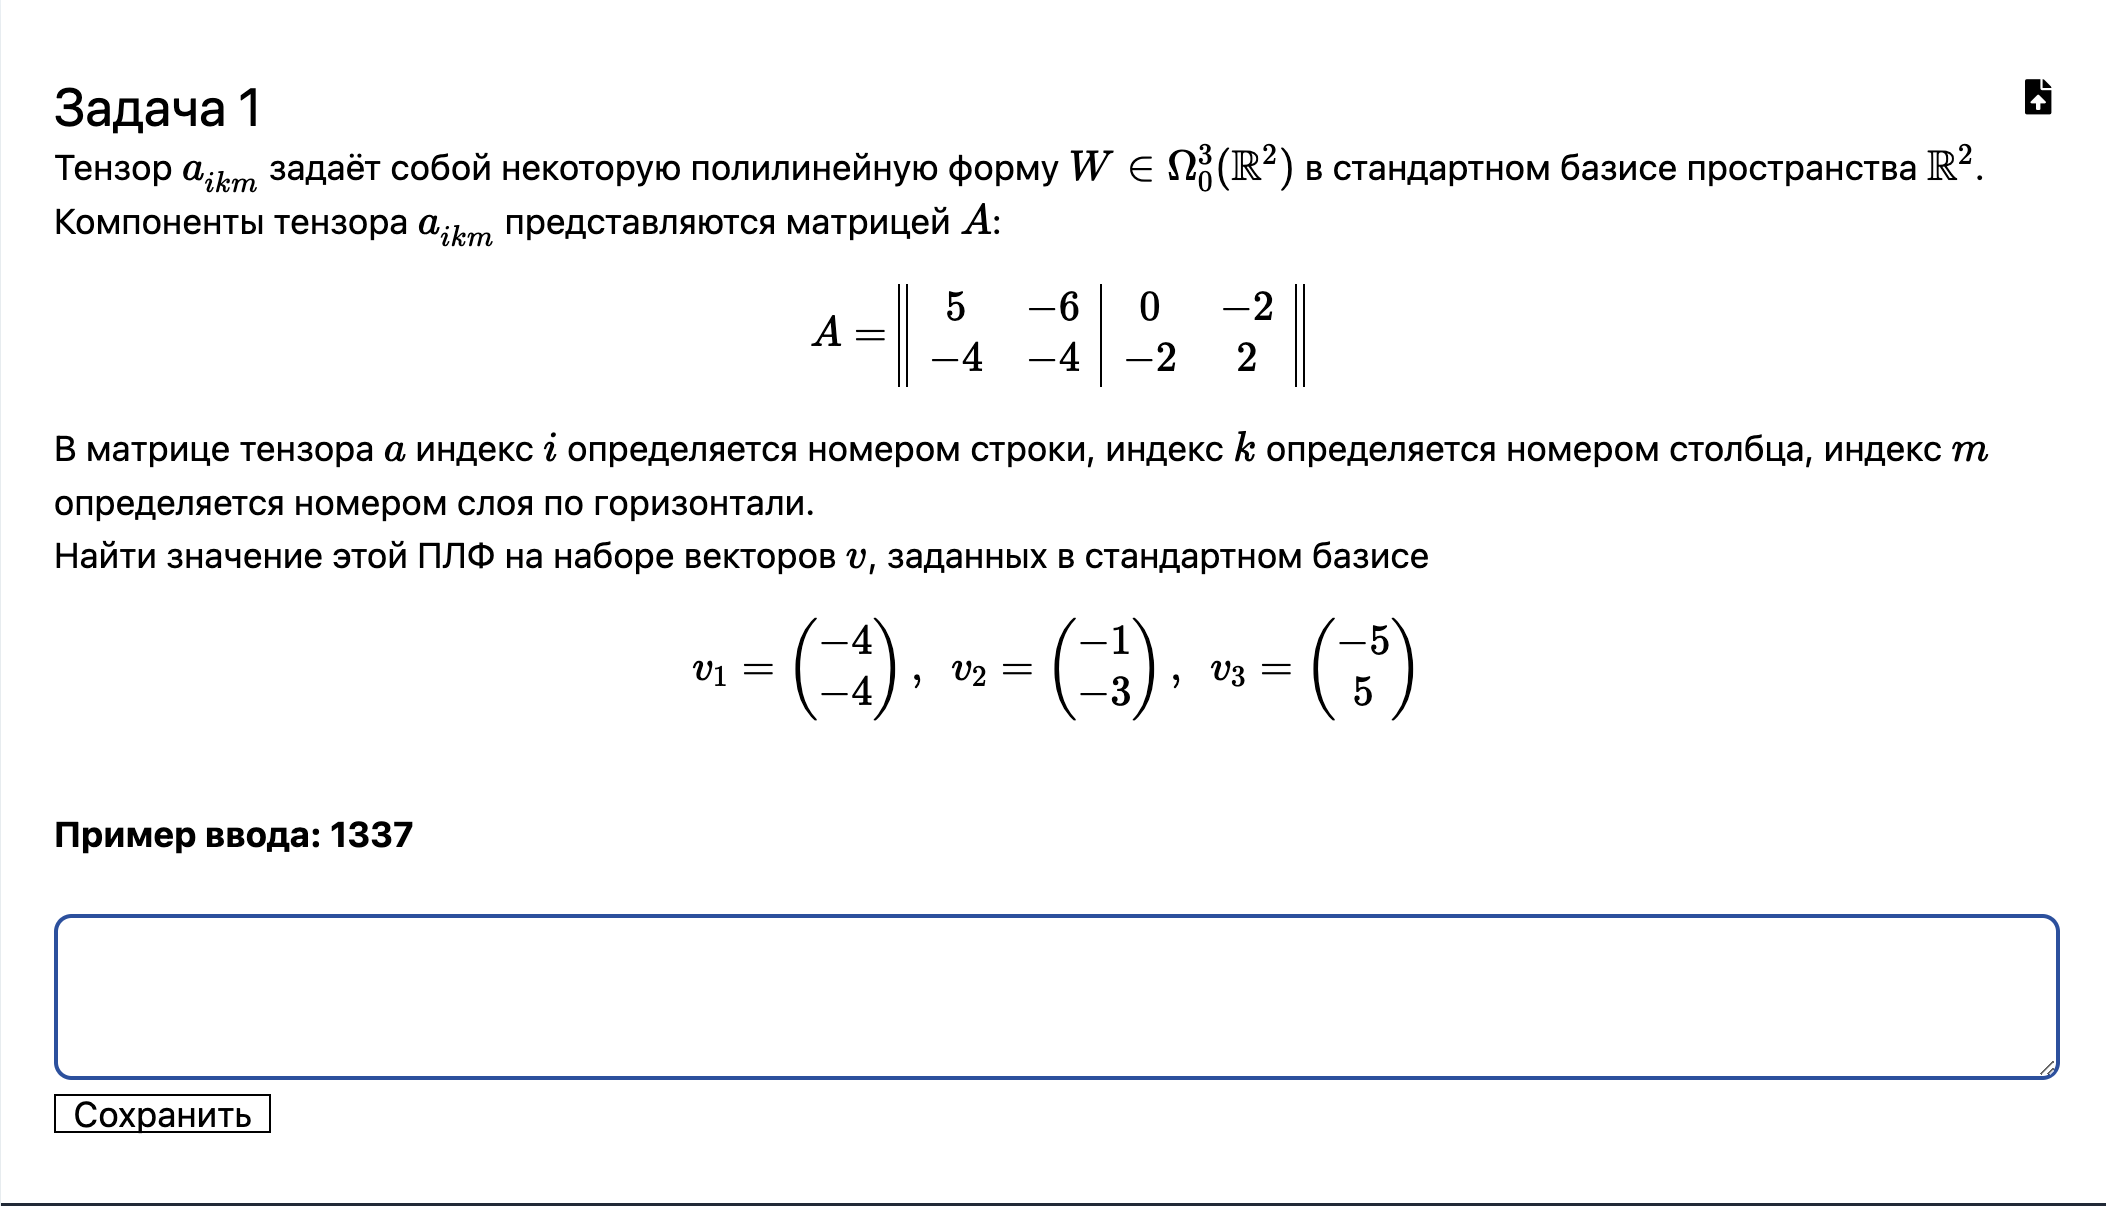

In [3]:
A = np.array([[[5, -6], [-4, -4]], [[0, -2], [-2, 2]]])

v1 = np.array([-4, -4])

v2 = np.array([-1, -3])

v3 = np.array([-5, 5])


c = 0

for m in range(2):
    for i in range(2):
        for k in range(2):
            c += A[m][i][k] * v1[i] * v2[k] * v3[m]
c

540

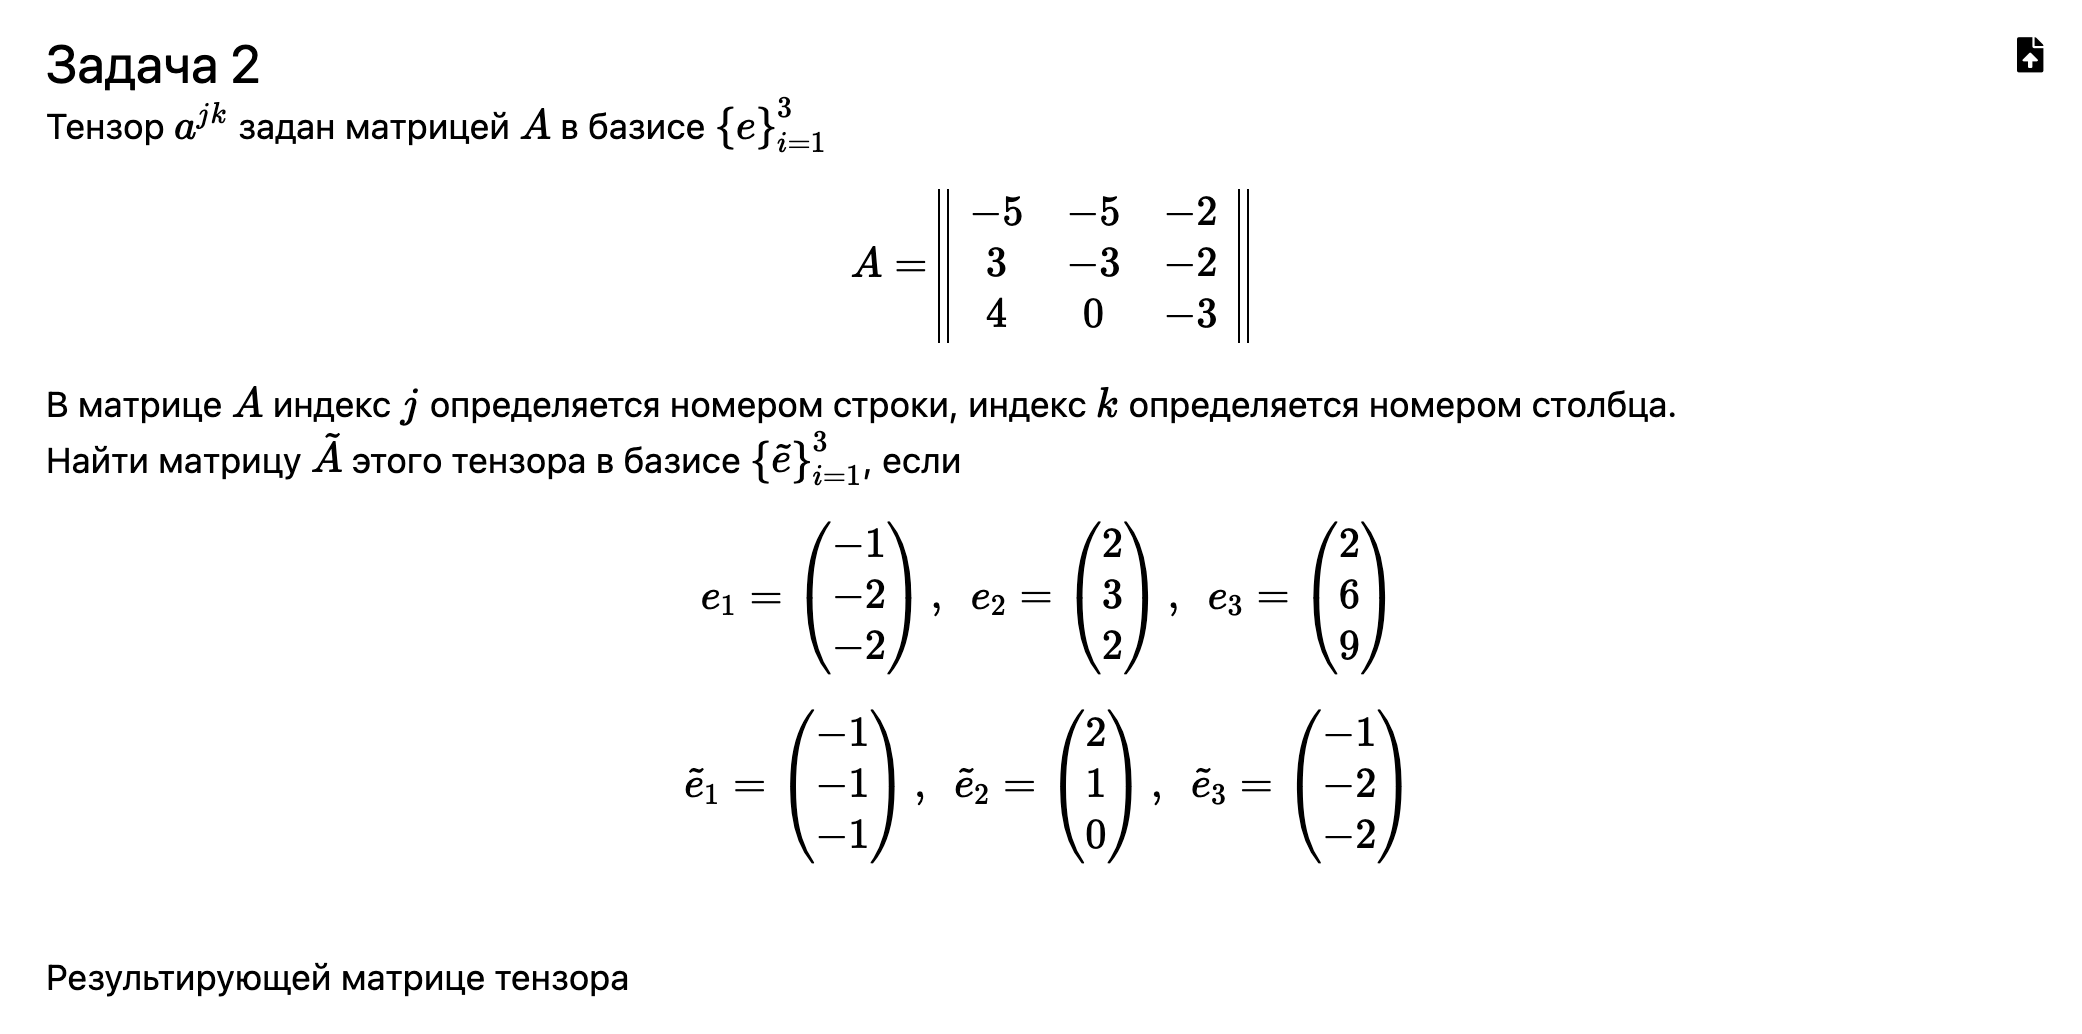

In [4]:
A = np.array([[-5, -5, -2], [3, -3, -2], [4, 0, -3]])
E = np.array([[-1, 2, 2], [-2, 3, 6], [-2, 2, 9]])
Enew = np.array([[-1, 2, -1], [-1, 1, -2], [-1, 0, -2]])
T = la.inv(E) @ Enew
S = la.inv(T)
np.einsum("jp, il, lp -> ij", S, S, A)

array([[-131.,  -57.,  -27.],
       [ -55.,  -24.,  -10.],
       [ -33.,  -14.,  -22.]])

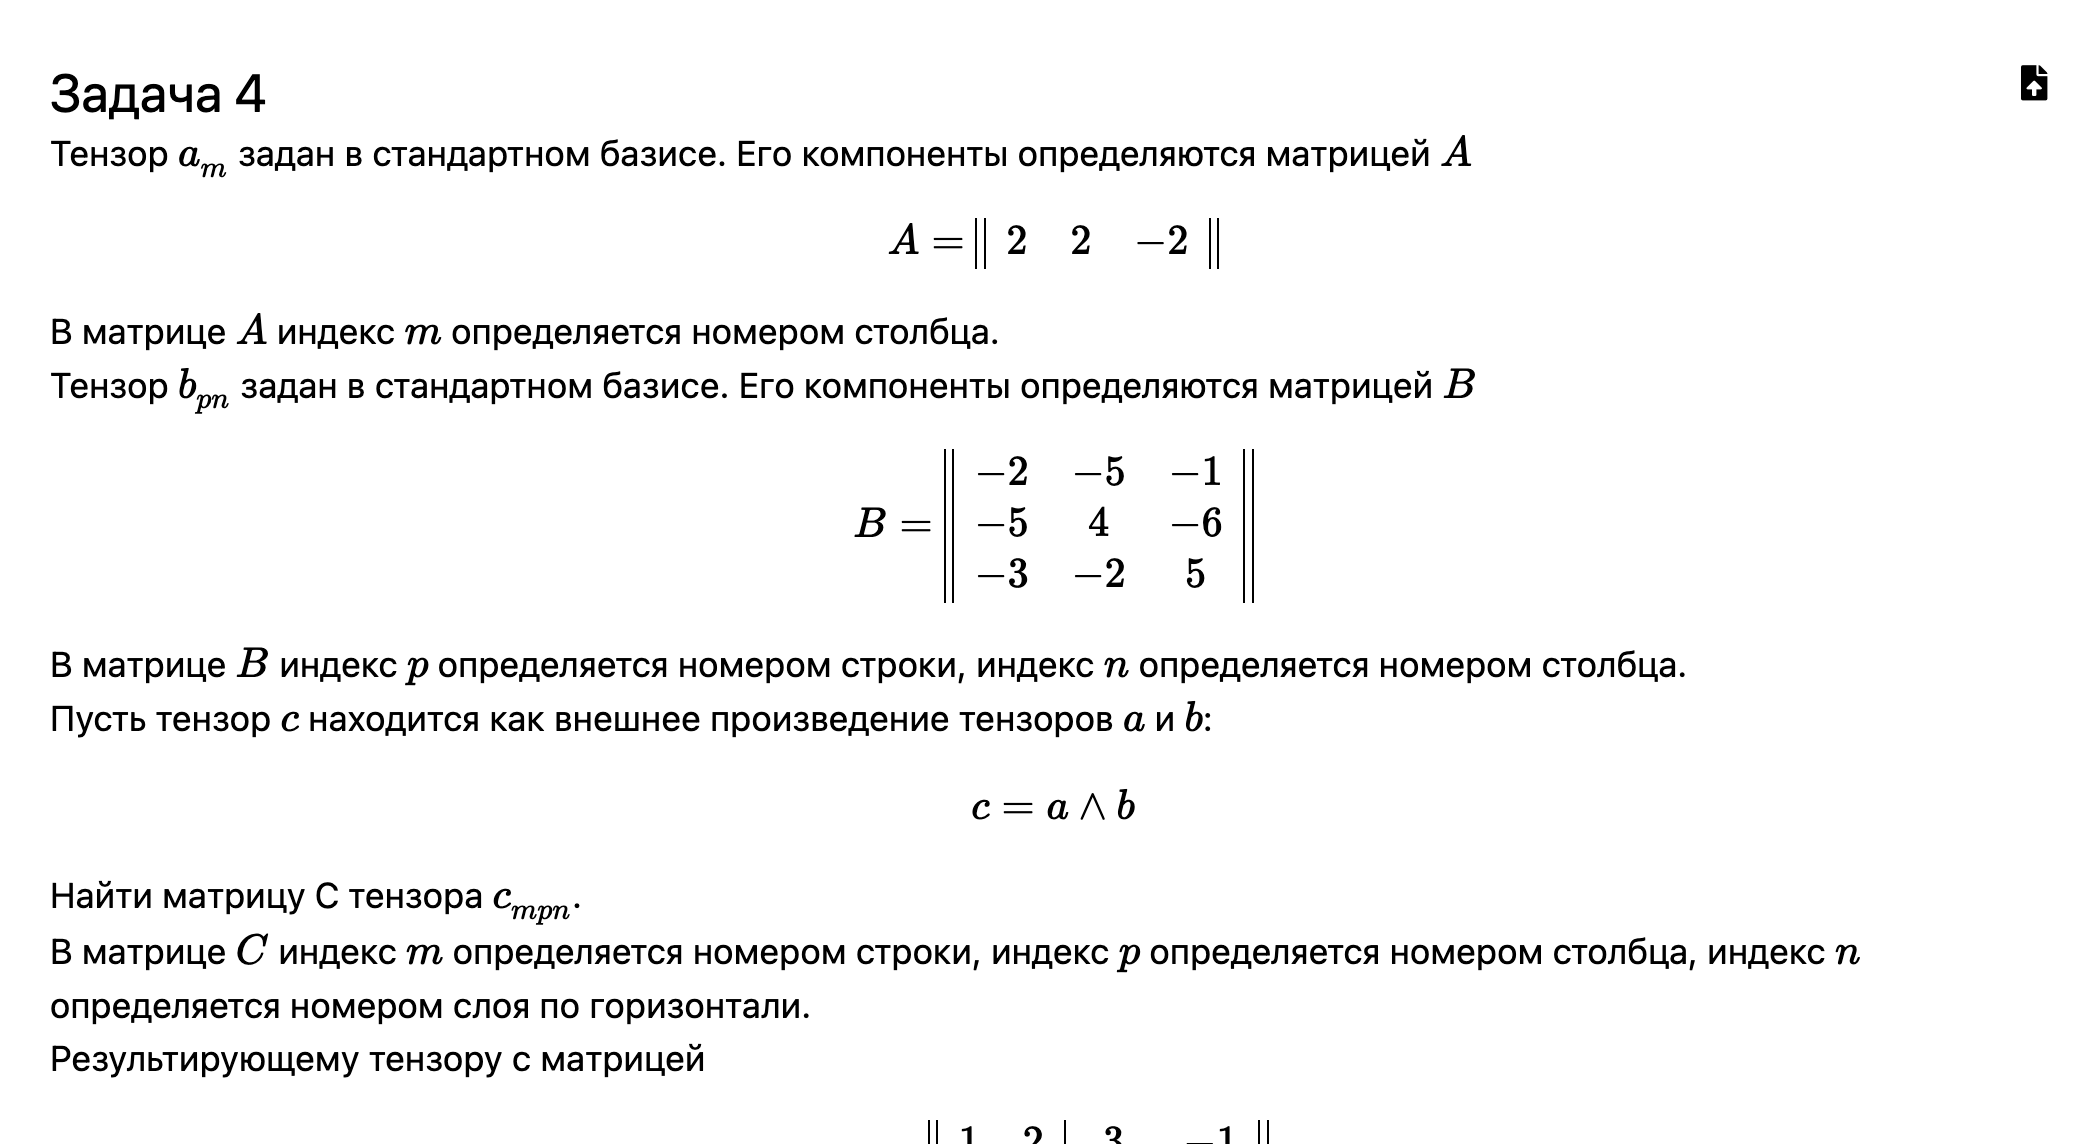

In [9]:
def mult(A: NDArray, B: NDArray) -> NDArray:
    # A - row, B - matrix (2,0)
    C_ilt = np.array([[[10, -2, -6], [-5, 1, 3], [10, -2, -6]], [[10, -10, -10], [-5, 5, 5], [10, -10, -10]], [[-2, -2, -4], [1, 1, 2], [-2, -2, -4]]])
    result = np.zeros_like(C_ilt)
    for k in range(3):
        for i in range(3):
            for j in range(3):
                result[k][i][j] = A[i] * B[j][k]
    return result

print(mult(np.array([-2, 1, -2]), np.array([[-5, -5, 1], [1, 5, 1], [3, 5, 2]])))

[[[ 10  -2  -6]
  [ -5   1   3]
  [ 10  -2  -6]]

 [[ 10 -10 -10]
  [ -5   5   5]
  [ 10 -10 -10]]

 [[ -2  -2  -4]
  [  1   1   2]
  [ -2  -2  -4]]]


In [10]:
def asymmetrisation(C_ilt: NDArray) -> NDArray:
#     C_ilt = np.array([[[10, -2, -6], [-5, 1, 3], [10, -2, -6]], [[10, -10, -10], [-5, 5, 5], [10, -10, -10]], [[-2, -2, -4], [1, 1, 2], [-2, -2, -4]]])

    C_lti = np.zeros_like(C_ilt)
    for t in range(3):
        for i in range(3):
            for l in range(3):
                C_lti[t][i][l] = C_ilt[i][l][t]

    C_til = np.zeros_like(C_ilt)
    for t in range(3):
        for i in range(3):
            for l in range(3):
                C_til[t][i][l] = C_ilt[l][t][i]

    C_itl = np.zeros_like(C_ilt)
    for t in range(3):
        for i in range(3):
            for l in range(3):
                C_itl[t][i][l] = C_ilt[l][i][t]

    C_tli = np.zeros_like(C_ilt)
    for t in range(3):
        for i in range(3):
            for l in range(3):
                C_tli[t][i][l] = C_ilt[i][t][l]

    C_lit = np.zeros_like(C_ilt)
    for t in range(3):
        for i in range(3):
            for l in range(3):
                C_lit[t][i][l] = C_ilt[t][l][i]

    return 1/2 * (C_ilt + C_lti + C_til - C_itl - C_tli - C_lit)

In [11]:
def first_task_solver(row_vector: NDArray, matrix: NDArray) -> NDArray:
    def stringify_geolin(A: NDArray):
        result = "["
        for d in range(3):
            for j in range(3):
                for p in range(3):
                    result += str(A[j][d][p])
                    if p != 2:
                        result += ', '
                if j != 2:
                    result += ', '
            if d != 2:
                result += "; "
        result += "]"
        return result
    tmp = mult(row_vector, matrix)
    return stringify_geolin(asymmetrisation(tmp))

In [12]:
first_task_solver(np.array([2, 2, -2]), np.array([[-2, -5, -1], [-5, 4, -6], [-3, -2, 5]]))

'[0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, -6.0, 0.0; 0.0, 0.0, -6.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0; 0.0, 6.0, 0.0, -6.0, 0.0, 0.0, 0.0, 0.0, 0.0]'